### Use a anaconda2 environment
* Install https://anaconda.org/menpo/opencv
* Install https://github.com/mxcube/lucid2

In [1]:
%matplotlib inline
import sys
from pathlib import Path
sys.path.append(str(Path('lucid3/').absolute()))

In [2]:
import random
import os
import lucid2
import lucid3
import matplotlib.pyplot as plt
import imageio as iio
import cv2

In [3]:
FRAMES_DIR = '/mnt/staff/common/ML-crystals/lyzo1_frames/'

In [4]:
def get_images(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

def get_samples(l, k):
    return sorted(random.sample(l, k), key=lambda f: f[-7:-4])

In [6]:
images = get_images(FRAMES_DIR)
samples = get_samples(images, 10)
samples

['/mnt/staff/common/ML-crystals/lyzo1_frames/frame-004.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-007.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-018.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-019.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-028.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-081.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-082.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-146.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-162.png',
 '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-175.png']

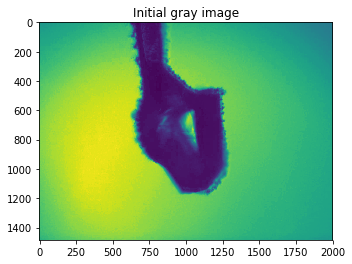

Min loop area: 59360.0


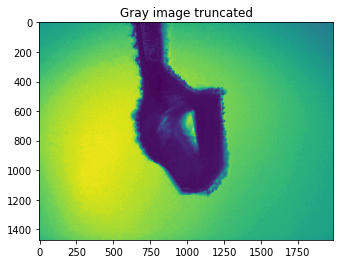

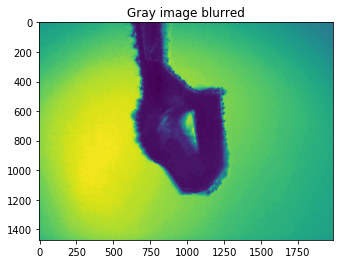

140


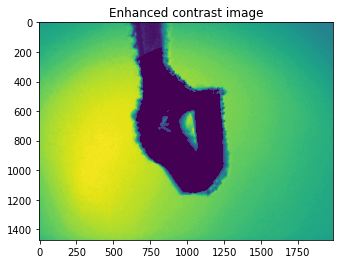

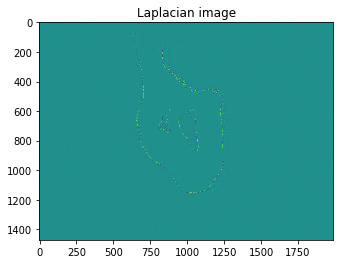

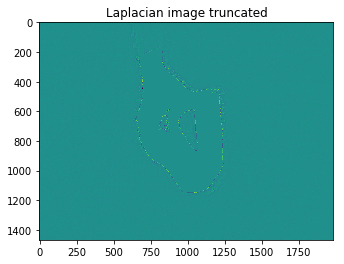

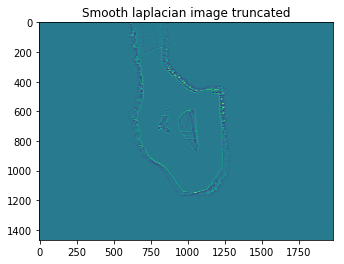

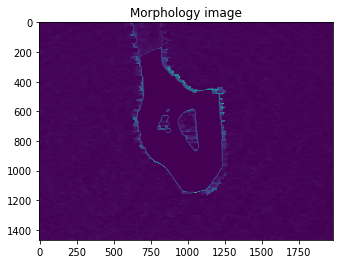

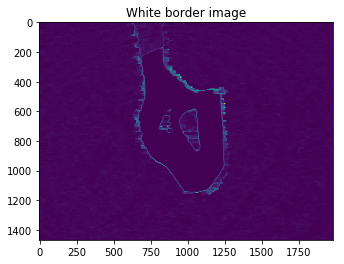

Threshold: 12


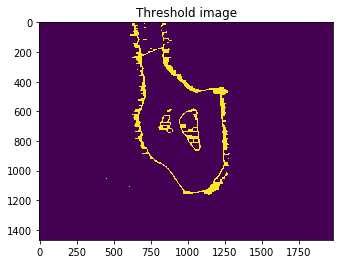

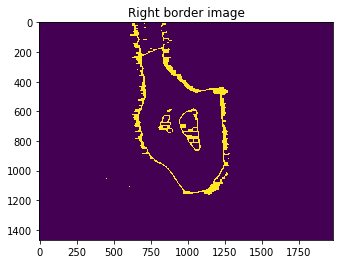

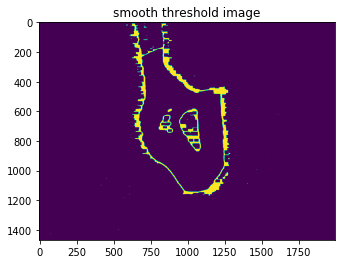

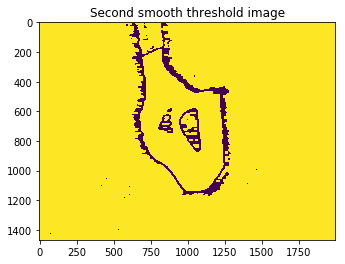

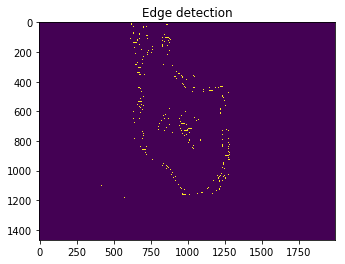

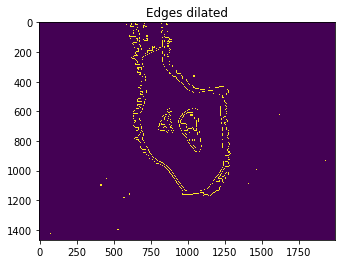

Contour area: 446400.0
Contour length: 1991
Max area contour: [[[626   5]]

 [[625   6]]

 [[624   6]]

 ...

 [[646   6]]

 [[645   6]]

 [[644   5]]]


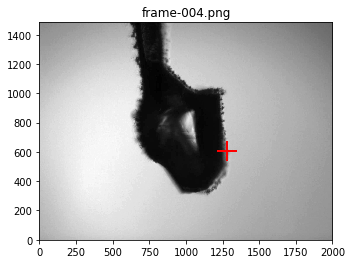

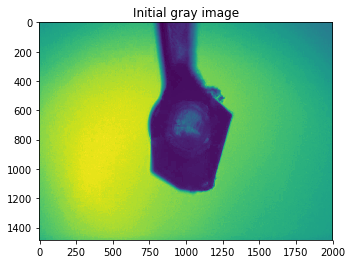

Min loop area: 59360.0


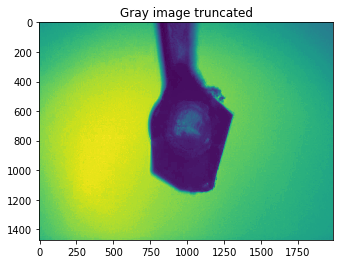

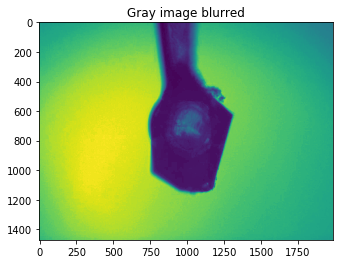

140


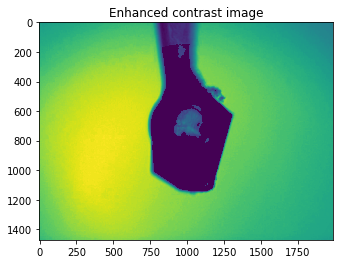

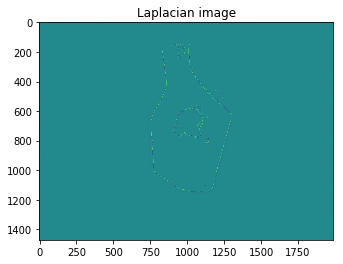

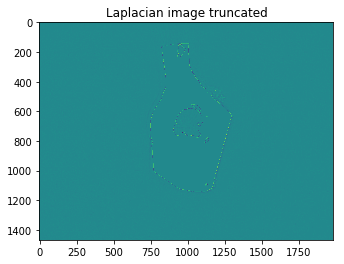

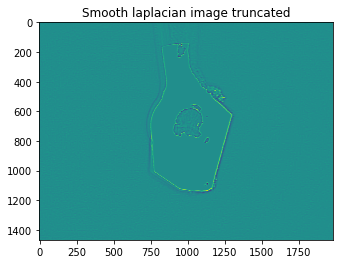

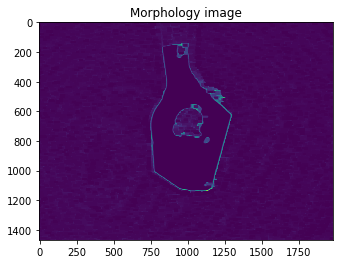

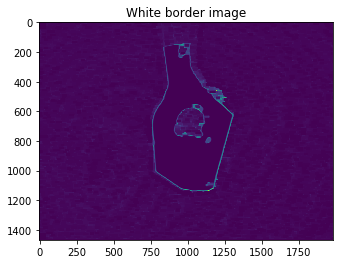

Threshold: 15


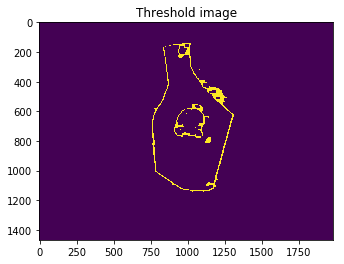

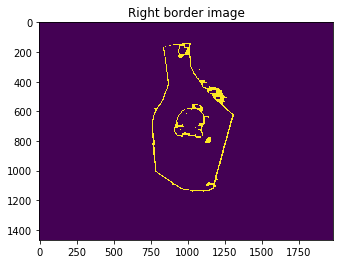

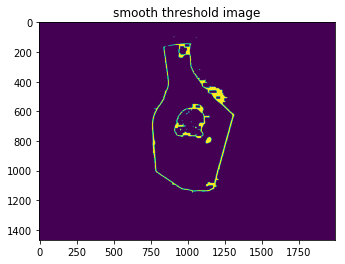

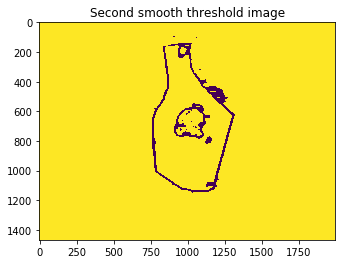

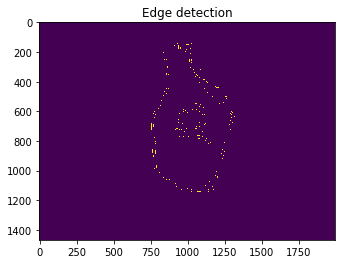

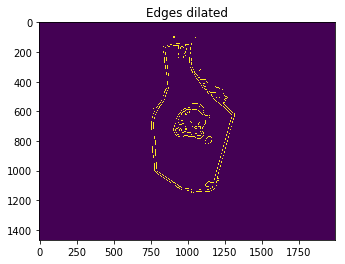

Contour area: 59569.0
Contour length: 2076
Max area contour: [[[ 967  139]]

 [[ 966  140]]

 [[ 954  140]]

 ...

 [[1025  140]]

 [[1024  140]]

 [[1023  139]]]


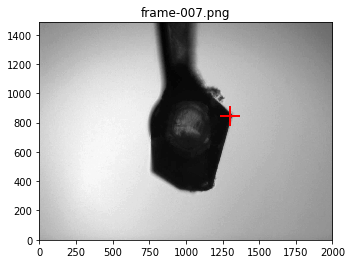

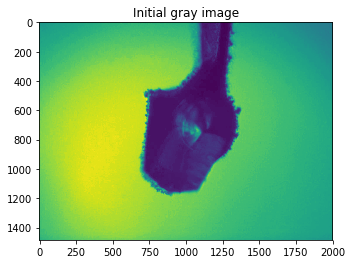

Min loop area: 59360.0


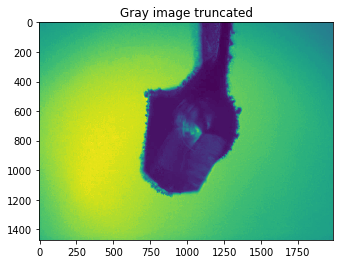

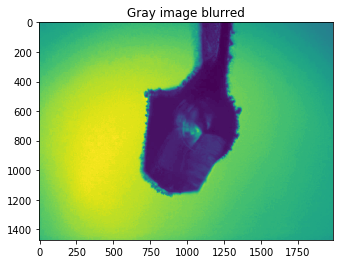

140


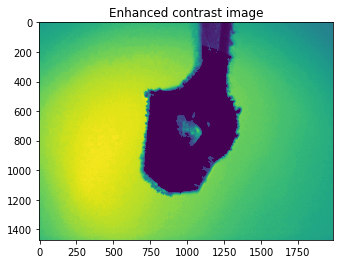

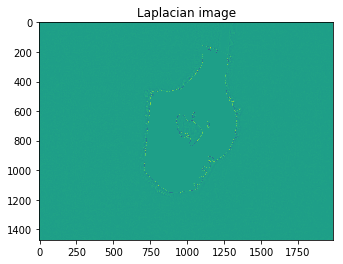

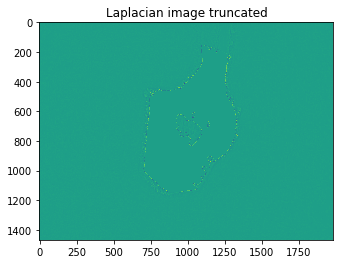

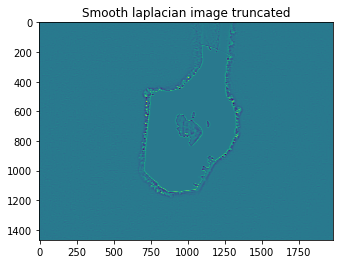

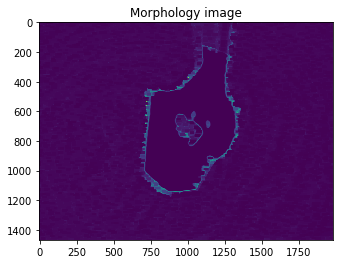

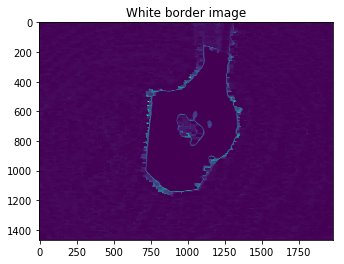

Threshold: 12


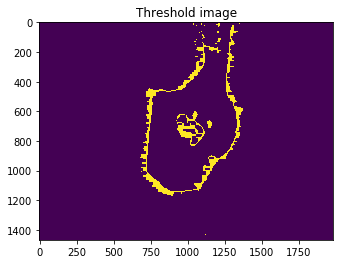

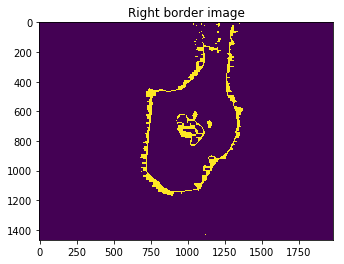

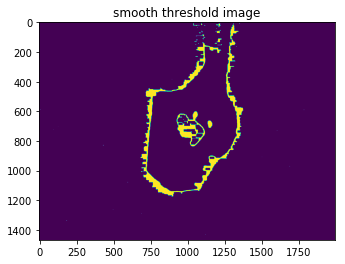

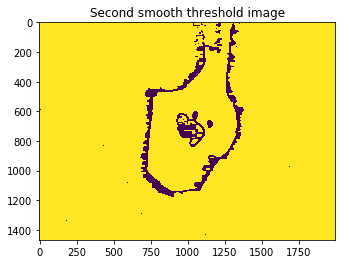

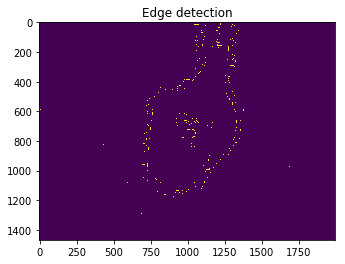

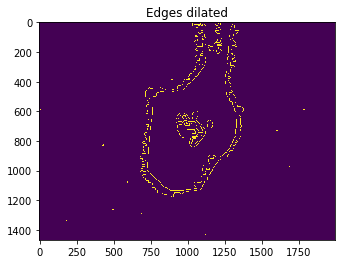

Contour area: 101717.5
Contour length: 2582
Max area contour: [[[1309    6]]

 [[1308    7]]

 [[1307    7]]

 ...

 [[1314    7]]

 [[1313    7]]

 [[1312    6]]]


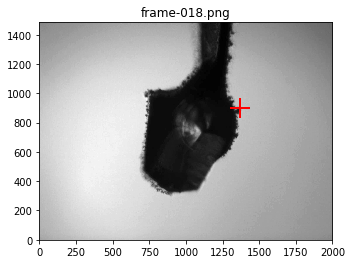

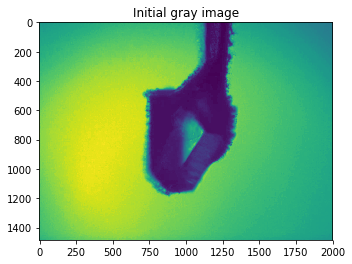

Min loop area: 59360.0


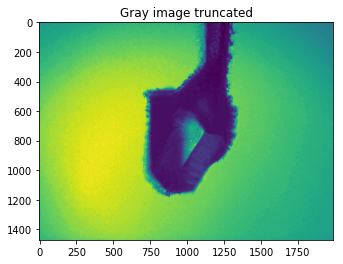

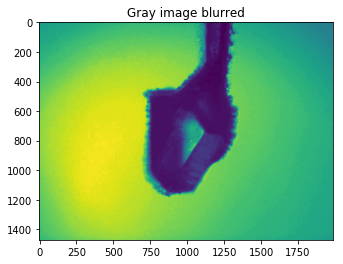

140


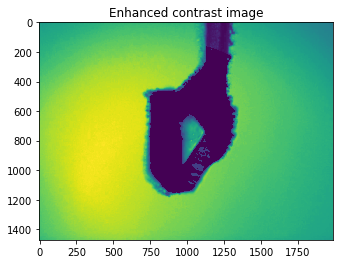

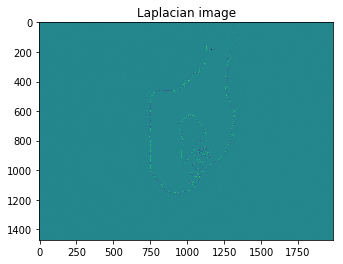

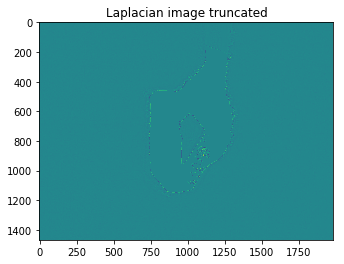

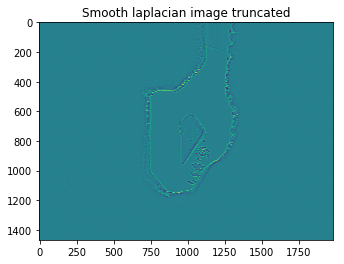

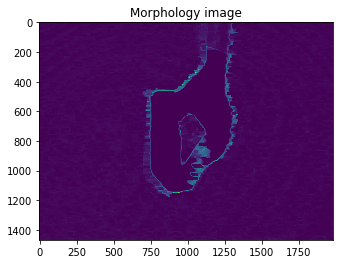

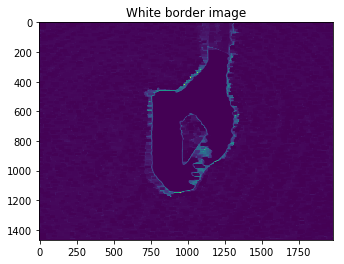

Threshold: 13


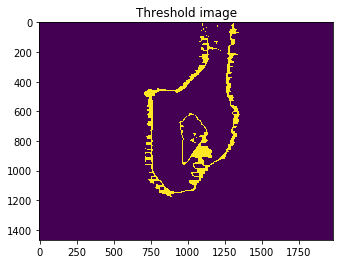

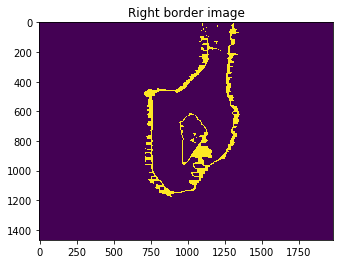

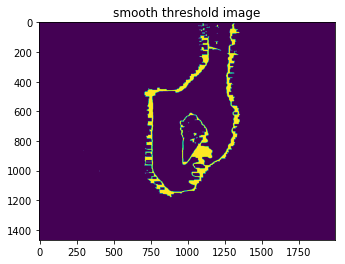

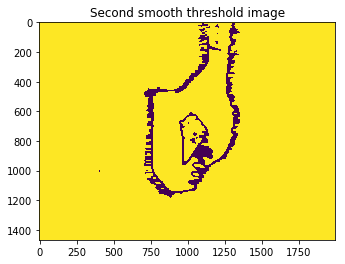

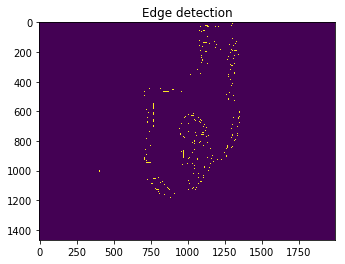

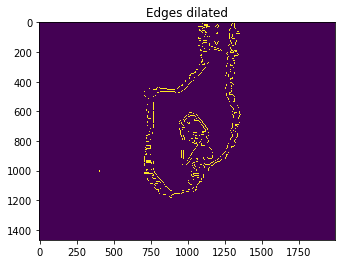

Contour area: 168267.5
Contour length: 3102
Max area contour: [[[1307    5]]

 [[1306    6]]

 [[1305    6]]

 ...

 [[1317    6]]

 [[1316    6]]

 [[1315    5]]]


OSError: [Errno 112] Host is down: '/mnt/staff/common/ML-crystals/lyzo1_frames/frame-019.png'

In [7]:
coords = [(s, lucid3.find_loop(s, debug=True)) for s in samples]

In [16]:
coords

[('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-034.png',
  ('Coord', 1216, 453)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-035.png',
  ('Coord', 1237, 604)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-046.png',
  ('Coord', 1295, 58)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-050.png',
  ('Coord', 1262, 709)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-066.png',
  ('Coord', 1252, 648)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-070.png',
  ('Coord', 1131, 696)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-090.png',
  ('Coord', 1093, 649)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-111.png',
  ('Coord', 1586, 737)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-113.png',
  ('Coord', 1586, 747)),
 ('/mnt/staff/common/ML-crystals/lyzo1_frames/frame-143.png',
  ('Coord', 1586, 742))]

In [13]:
coords_found = filter(lambda tup: tup[1][0] == 'Coord', coords)
images = [(tup[0], iio.imread(tup[0]), tup[1]) for tup in coords_found]
len(images)

10

In [14]:
COLS = 3


def plot_all(images):
    i = 1
    fig = plt.figure(figsize=(40, 30))
    for name, img, coord in images:
        ax = fig.add_subplot((len(images) // COLS) + 1, COLS, i)
        ax.imshow(img)
        ax.scatter(coord[1], coord[2], s=50, c='red', marker='o')
        ax.set_title(os.path.basename(name), {'fontsize': 26})
        i += 1

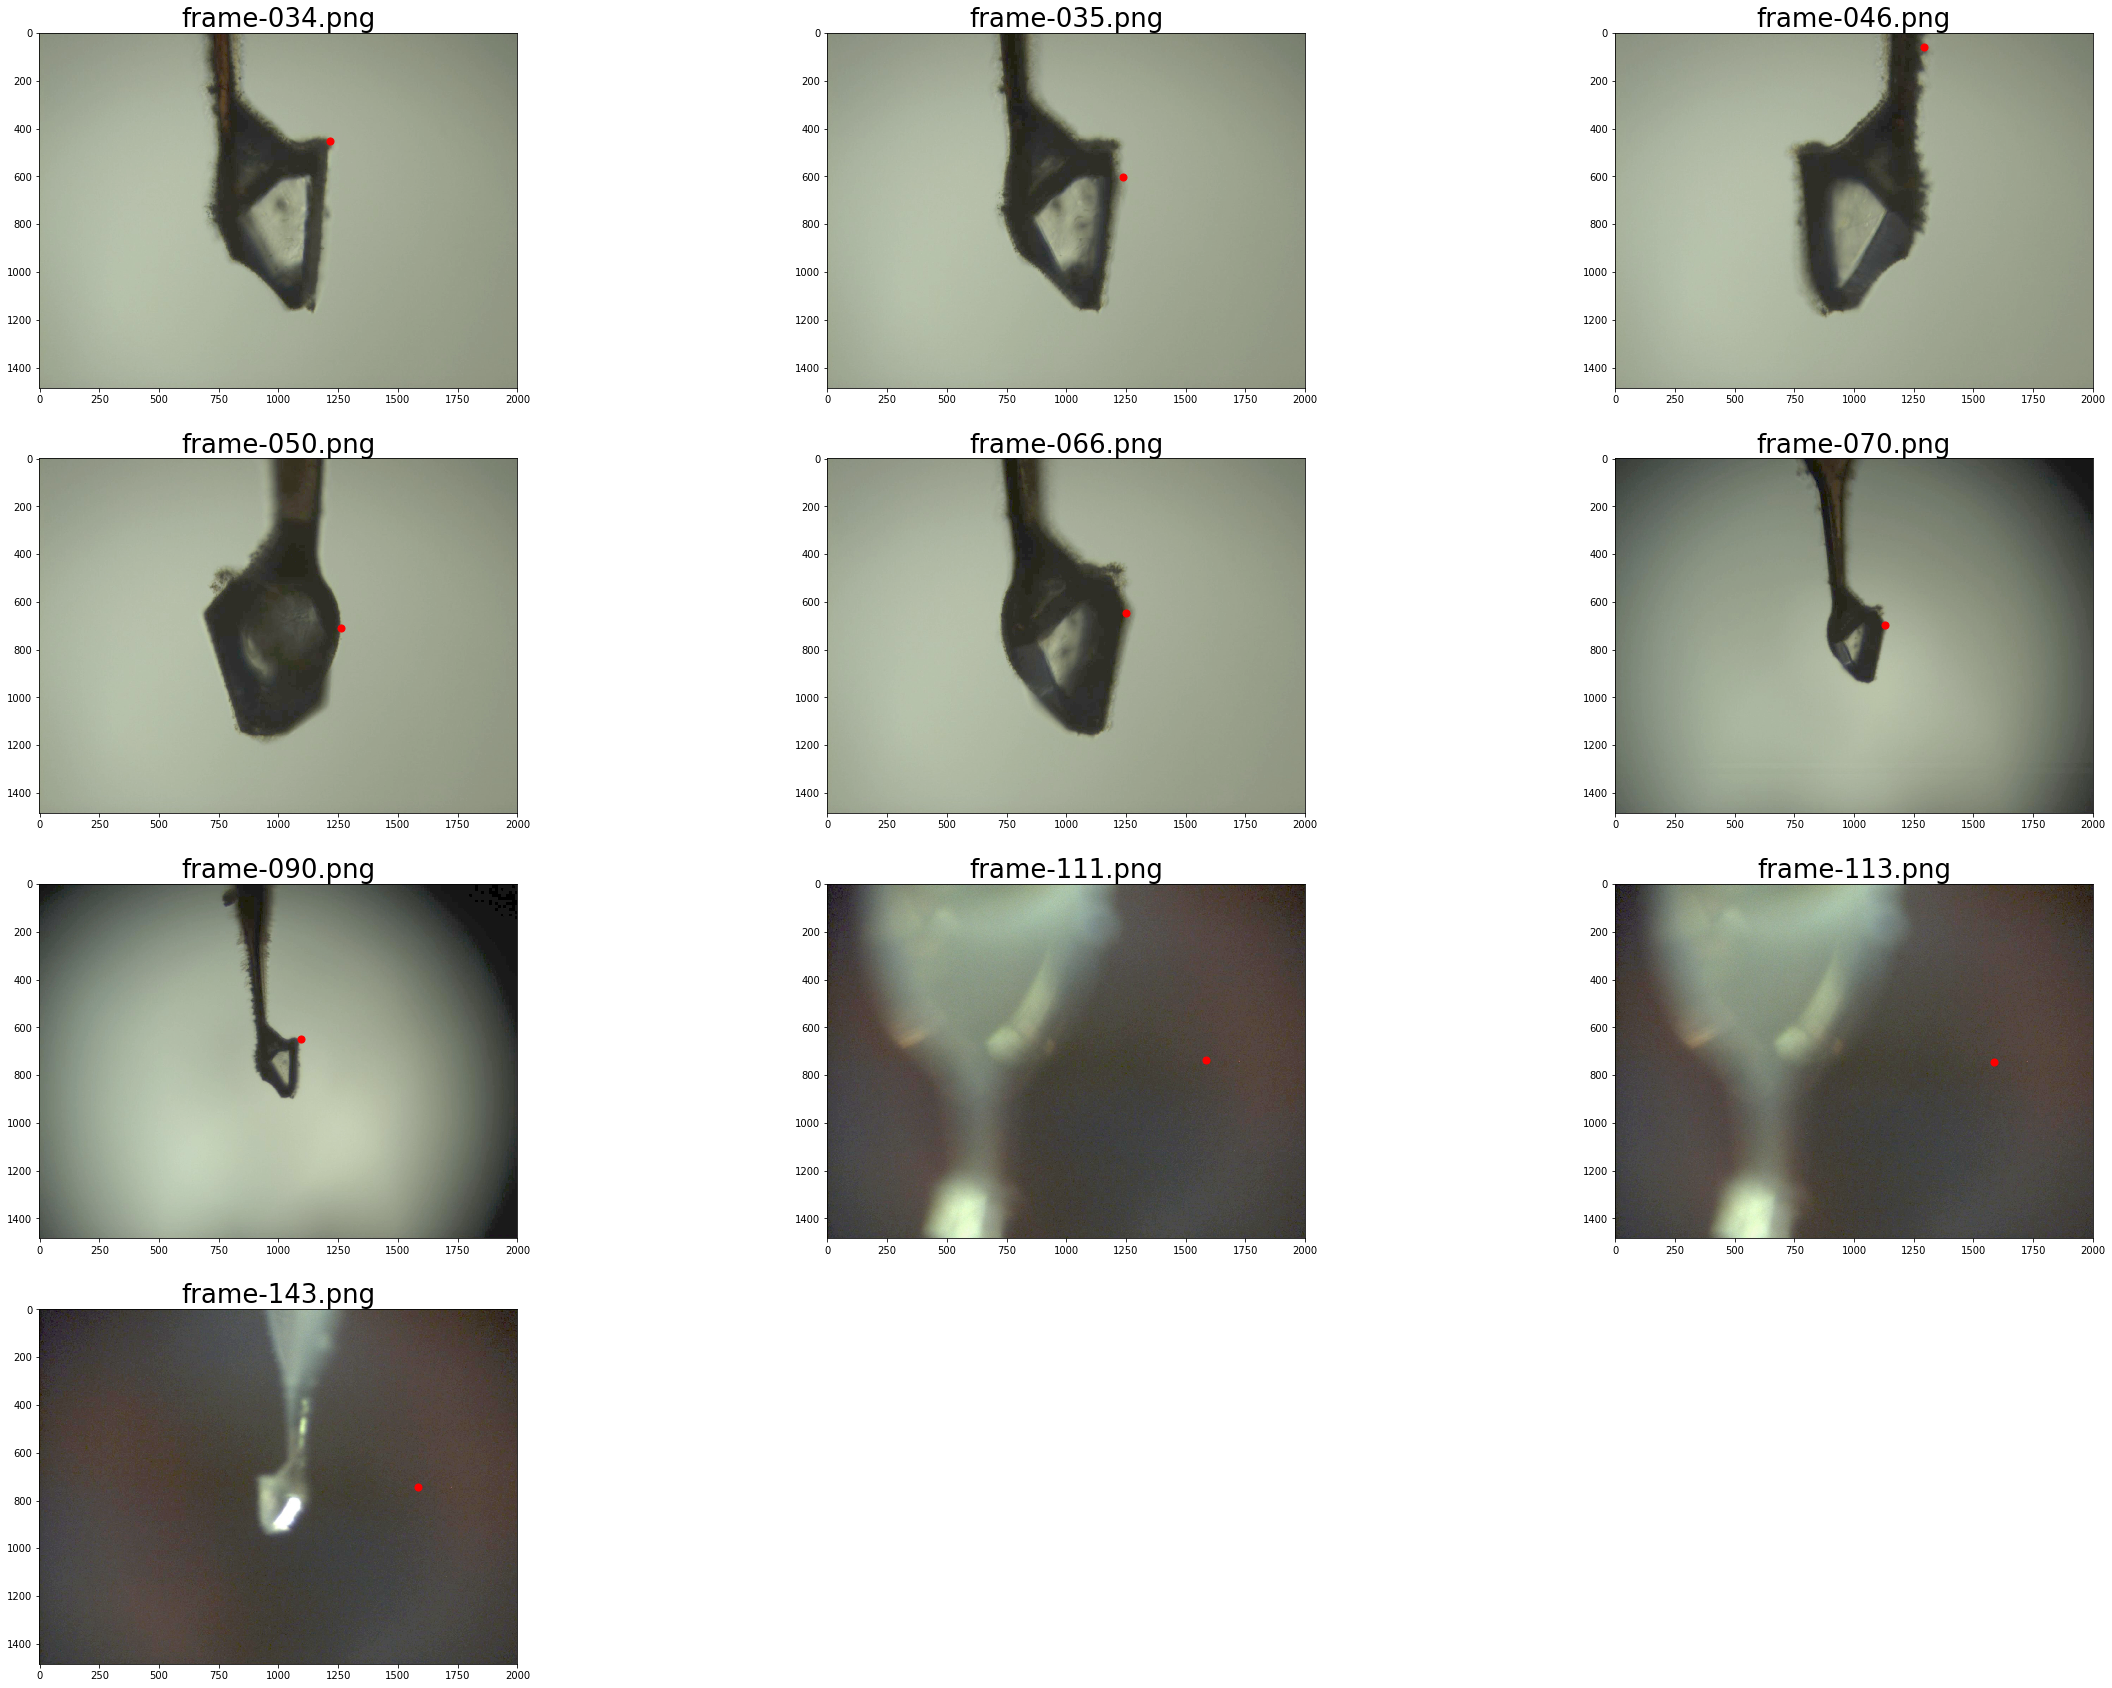

In [15]:
plot_all(images)